In [52]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime,timedelta

In [53]:
#opening the browser.
driver = webdriver.Chrome(service= Service(ChromeDriverManager().install()))
#opening the instagram page in the above browser.
driver.get('https://www.instagram.com/?hl=en')
#declaring wait.
wait = WebDriverWait(driver,10)

try:
    link = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_ab37")))
    link.click()
    mailid = wait.until(EC.presence_of_element_located((By.NAME, "email")))
    mailid.send_keys('kirtigarg17aug01@gmail.com')
    pswrd = driver.find_element(By.NAME, "pass")
    pswrd.send_keys('Kkkirtigarg@170801')
    pswrd.submit()
    mailid.submit()
    pop_up = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[text()='Not Now']")))
    pop_up.click()
    
except TimeoutException:
    print("Pop up not removed!")

In [141]:
pop_up = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[text()='Not Now']")))
pop_up.click()

## Question : 1
>Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

    1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    2. Now Find the number of posts these handles have done in the previous 3 days.
    3. Depict this inform

>1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [ ]:
#this code is for when the search bar is visible. this you will find when the size of the instgram
#window is  short.

try :
    search_box = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "_aauy")))
    search_box.clear()
    search_box.send_keys('food')
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4')))
    li = driver.find_elements(By.CLASS_NAME, '_abm4')
    food_handles=[]
    for i in li:
        if i.text[0] != "#":
            food_handles.append(i.text.split('\n')[0])
#             print(i.text.split('\n')[0])
    print(food_handles[0:10])
    
except TimeoutException:
    print("can't search")
    

In [ ]:
food_list = food_handles[0:10]
print(food_list)

In [3]:
def search_open(driver, query):
    try :
        search_box = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "_aauy")))
        search_box.clear()
        search_box.send_keys(query)

        #waiting for the first element to load
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4'))).click()

    
    except TimeoutException:
        print("can't search!")

In [4]:
food_list = ['foodfoodtv', 'foodtalkindia', 'value_of_food', 'sodelhi_food', 'iitd.food.critic', 'foodiee.preneur', 'food', 'dilsefoodie', 'foodie_incarnate', 'foodnetwork']

def top_five(driver,handles):
    
    d = {}
    
    for i in handles:
        search_open(driver, i)
        
        
        follower_count = wait.until(EC.element_to_be_clickable((By.XPATH, "//li[contains(@class, 'x6s0dn4')]/a/div/span"))).get_attribute("title")
        follower_btn = wait.until(EC.element_to_be_clickable((By.XPATH, "//li[contains(@class, 'x6s0dn4')]/a/div")))
        
        d[i] = int(follower_count.replace(",",""))
        time.sleep(2)
        driver.back()
    d = dict(sorted(d.items(), key = lambda x : x[1], reverse = True))
#     print(d)
    count = 0
    final_dic = {}
    for i in d:
        final_dic[i]=d[i]
        count += 1
        if count>4:
            break
    return final_dic
        

In [58]:
topFive = top_five(driver, food_list)

In [59]:
print(topFive)
print(type(topFive))

{'foodnetwork': 12760921, 'foodie_incarnate': 1465130, 'dilsefoodie': 1066035, 'foodtalkindia': 309353, 'foodfoodtv': 272284}
<class 'dict'>


>1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [141]:
topfive = {'foodnetwork': 12760921, 'foodie_incarnate': 1465130, 'dilsefoodie': 1066035, 'foodtalkindia': 309353, 'foodfoodtv': 272284}

In [146]:
def search_open(driver, query):
    try :
        search_box = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "_aauy")))
        search_box.clear()
        search_box.send_keys(query)

        #waiting for the first element to load
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4'))).click()

    
    except TimeoutException:
        print("can't search!")

In [151]:
d = {}
for i in topfive:
    search_open(driver,i)
    time.sleep(2)
    
    
    # clicking on first post after scrolling till it is visible.
    element = driver.find_element(By.XPATH,'//div[starts-with(@class,"_aabd ")]')
    time.sleep(1)
    driver.execute_script("arguments[0].scrollIntoView(true);", element)
    time.sleep(1)
    element.click()
    
    #list of pinned posts
    Pinned_posts = driver.find_elements(By.XPATH, '//div[@class="_aatp"]/div/*[name()="svg"][@aria-label="Pinned post icon"]')

    count = 0
    flag = True
    while flag:
        
        #to rule out the pinned posts bcz they are obviosly older than three days.
        if len(Pinned_posts)!=0:
            for j in Pinned_posts:
                next_post = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'_aaqg')]/button")))
                next_post.click()
        date_time = wait.until(EC.presence_of_element_located((By.XPATH, "//time[@class = '_aaqe']"))).get_attribute("datetime")
        # converting date_time from string type to datetime type
        date = datetime.fromisoformat(date_time[0:19])
        today = datetime.now()
        difference = today-date
        if difference.days<=3:
            count += 1
        else: 
            flag = False
            

        try:
            next_post = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'_aaqg')]/button")))
            next_post.click()

        except TimeoutException as e:
            print("There are no more posts!")
            flag = False

    close_btn = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'x10l6tqk')]/div/div")))
    close_btn.click()
    
    #going back to home screen.
    driver.back()
    d[i] = count
print(d)

{'foodnetwork': 46, 'foodie_incarnate': 2, 'dilsefoodie': 3, 'foodtalkindia': 5, 'foodfoodtv': 1}


> 3. Depict this information using a suitable graph.

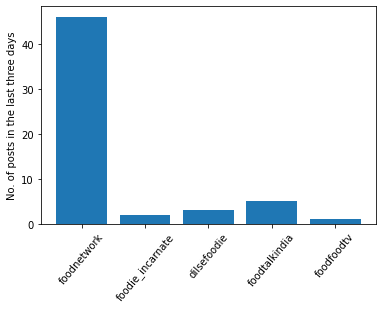

In [153]:
import matplotlib.pyplot as plt
x = list(d.keys())
y = list(d.values())
plt.bar(x,y,align = 'center')
plt.ylabel("No. of posts in the last three days")
plt.xticks(x,rotation = 50)
plt.show()


## Question: 2

>Your friend also needs a list of hashtags that he should use in his posts.

    1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [80]:
topfive = {'foodnetwork': 12760921, 'foodie_incarnate': 1465130, 'dilsefoodie': 1066035, 'foodtalkindia': 309353, 'foodfoodtv': 272284}

In [81]:
def search_open(driver, query):
    try :
        search_icon = driver.find_elements(By.XPATH, "//div[contains(@class,'x1n2onr6')]/a")[2]
        search_icon.click()
        # clicking on search box
        search_box = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'_aawf')]/input")))
        search_box.click()
        search_box.clear()
        search_box.send_keys(query)

        #waiting for the first element to load
        first = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4')))
        first.click()

    
    except TimeoutException:
        print("can't search!")

In [83]:

dic = {}
for i in topfive:
    search_open(driver,i)
    time.sleep(2)
    firstpost = driver.find_element(By.XPATH,'//div[starts-with(@class,"_aabd ")]')
    
    time.sleep(2)
    firstpost.click()
    d = {}
    count = 1
    while count < 11:
        content = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = '_a9zr']/div/span"))).text
        d[count] = content
        try:
            next_post = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'_aaqg')]/button")))
            next_post.click()
        except TimeoutException as e:
            print("There are no more posts!")
        count += 1
    dic[i] = d

    

       
    driver.back()
    time.sleep(2)
    driver.back()
    time.sleep(2)
print(dic)

{'foodnetwork': {1: "Recipe of the Day: @inagarten's Chicken Pot Pie 🤩\n\nSearch for the recipe on FoodNetwork.com!", 2: "Get a sneak peek at the tailgate dishes being served up when the @broncos host the @colts on the next episode of @nfl #TailgateTakedown!\n\nIt's all-new Wednesday at 9|8c.", 3: 'Unravel store-bought cinnamon roll dough to make swirled PANCAKES that are the best of both worlds! 🌀\u2060\n\u2060\nSearch "Cinnamon Roll-Wrapped Pancakes" on FoodNetwork.com for the recipe!\u2060\n\u2060\n🎥: @sprinklebakes', 4: '@wolfiesmom whips up easy-to-make no-bake granola bars with a decadent chocolate drizzle! 🤤\n\n#KidsBakingChampionship is all-new Monday at 8|7c. Stream it the same day on @discoveryplus. #discoveryplus\n\nFind the recipe for Valerie\'s "No-Bake Granola Bars with Carob Drizzle" on FoodNetwork.com!', 5: '@chefanneburrell prepares a flavorful, plant-based burger that\'s just as satisfying as its meaty counterpart! 🍔\n\n#WorstCooks is all-new Sunday at 8|7c.\n\nFind t

> 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [31]:
di = {'foodnetwork': {1: "Recipe of the Day: @inagarten's Chicken Pot Pie 🤩\n\nSearch for the recipe on FoodNetwork.com!", 2: "Get a sneak peek at the tailgate dishes being served up when the @broncos host the @colts on the next episode of @nfl #TailgateTakedown!\n\nIt's all-new Wednesday at 9|8c.", 3: 'Unravel store-bought cinnamon roll dough to make swirled PANCAKES that are the best of both worlds! 🌀\u2060\n\u2060\nSearch "Cinnamon Roll-Wrapped Pancakes" on FoodNetwork.com for the recipe!\u2060\n\u2060\n🎥: @sprinklebakes', 4: '@wolfiesmom whips up easy-to-make no-bake granola bars with a decadent chocolate drizzle! 🤤\n\n#KidsBakingChampionship is all-new Monday at 8|7c. Stream it the same day on @discoveryplus. #discoveryplus\n\nFind the recipe for Valerie\'s "No-Bake Granola Bars with Carob Drizzle" on FoodNetwork.com!', 5: '@chefanneburrell prepares a flavorful, plant-based burger that\'s just as satisfying as its meaty counterpart! 🍔\n\n#WorstCooks is all-new Sunday at 8|7c.\n\nFind the recipe for "Mushroom and Black Bean Burger with American Cheese" on FoodNetwork.com!', 6: 'Shrimp Coconut Curry is the comfy weeknight meal you NEEED! (Thanks, @ManeetChauhan 👏)\u2060\n\u2060\nGet the recipe with the link in our bio.', 7: 'The dinner options are endless when you have a pot of homemade chicken stock simmering on the stove! @geoffreyzakarian uses kitchen leftovers for an easy and money-saving stock 👏👏\n\nWatch #TheKitchen, Saturdays at 11a|10c and subscribe to @discoveryplus to stream more episodes. #discoveryplus\n\nGet the recipe for "GZ\'s Chicken Stock" on FoodNetwork.com!', 8: 'With basket ingredients to gamble, things can get a little DICEY on #Chopped Casino Royale! 🎲\n\nDon’t miss battle two of this tournament on Tuesday at 8|7c! 🔪 Stream past seasons of #Chopped now on @discoveryplus. #discoveryplus', 9: '@superchef_23 grills up a spice-rubbed steak with lemongrass for this easy and elegant rice bowl!\n\n#WorstCooks is all-new Sunday at 8|7c.\n\nFind the recipe for "Sesame Skirt Steak with Coconut Lemongrass Rice Bowl" on Foodnetwork.com!', 10: "@mollyyeh fills her golden brown Arayes, a popular Middle Eastern dish, with delicious spiced beef and serves them with a side of creamy yogurt-tahini sauce 😍🥙\n\nWatch a NEW #GirlMeetsFarm Sundays @ 11a|10c. Subscribe to @discoveryplus to stream the series. #discoveryplus\n\nGet Molly's recipe for Arayes on FoodNetwork.com!"}, 'foodie_incarnate': {1: "4 Million Subscribers on YouTube🤩🤩\n.\nWhen i started my YouTube journey back in Dec 2020, if someone had told me that i'll be having 40,00,000+ subscribers a couple of years later, i'd have laughed on it. But with loads of hardwork and loads of love that you guys gave me..i have reached this milestone. Can't thank you guys enough.❤️❤️\nWill be working even harder to post even better content and keep showing you guys the best vegetarian food on Earth.🤗🤗", 2: 'Lunch scenes from @potpot.in 🤩🤩\n.\nOne of the best eateries in DLF Avenue, Saket👍🏻\n.\n#foodieincarnate #foodieincarnaterestaurantreviews #newdelhi #dlfavenue', 3: 'Crazy Making Process of Manda Roti in Indore😱😱\n.\nWatch the full video on my YouTube channel. Link is in my bio🤗🤗\n.\n#foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #bread #indore #viralfood #indianfood #explore', 4: 'Insane Making Process of Kala Namak😱😱\n.\nWatch the full video on my YouTube channel. Link is in my bio🤗🤗\n.\n#foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #streetfood #unique #viralvideos #explore', 5: 'Mahakal Thandai of Indore😱😱\n.\nWatch the full video on my YouTube channel. Link is in my bio🤗🤗\n.\n#foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #thandai #milkshake #indore #streetfood #viralfood', 6: 'Our ring ceremony💍❤️\n08-12-2022\n\nVenue: @grand5resort\nVideography: @rajatmaheshwari.in\nMusic: @adityarikhari', 7: 'Hello from Himachal! 🌨️☃️\n.\n#foodieincarnate #snowfall #himachaltourism #himachalpradesh #shimla #kufri #himachal #snowdrop', 8: 'Gadadhaari Shikanji of Patna😱😱\n.\nWatch the full video on my YouTube channel. Link is in my bio🤗🤗\n.\n#foodieincarnate #reelitfeelit #reelkarofeelkaro #reelsinstagram #reels #patna #bihar #viralfood #explore', 9: 'Guys, I am super excited for New Years and mere toh party plans sorted hai... ✨\n\nI know exactly how to get everyone together and make moments more magical 😁\n\nWith @monginiscelebrations you can get the most beautiful, yummy, and magical cakes that will be loved by everyone!\n\nYou can look for the nearest store at: https://cakesonline.monginis.net or order online.\n\n#foodieincarnate #magiceverytime #magicwithmonginis\n#monginis #christmas #newyear2023 #NewYearParty #Celebrations', 10: 'Ice Apple to start the day🥥🍎\n.\nAlso known as Tadgola or Nungu..Ice Apple is the fruit of Palm Tree. Its edible part looks like a big litchi without the seed but its juicy and its taste has mild sweetness in it. It is one of my favourite fruits.❤\n.\n#foodieincarnate #sodelhi #newdelhi #delhigram #foodtalkindia #desifood #indianfood #iceapple #palmfruit #freshfruit #marathi #maharashtra_ig #fruitarian #veganfood #delhite #somumbai #mumbaifoodblogger #mumbai_igers #tropicalfruit #hydrovegan #dragonfruit #starfruit #marathifood #summerfruit #summerfood #seasonalfruit #thali #summers #kolkata #tadgola'}, 'dilsefoodie': {1: 'Kharode Making In Bulk At Pindi Wala, Ramesh Nagar\n#dilsefoodie #dilsecouple #food #kharode', 2: 'Delhi Winters And Keema Meat At Ashok And Ashok Meat Dhaba, Sadar Bazar #dilsefoodie #streetfood #meat', 3: 'And we experienced this Sattvic Unlimited Thali In Rs 290 At @ekyamkitchen , Ambala Cant\nLess than 1km From Delhi - Punjab Highway\n#Ad #dilsefoodie #sattvicfood #ekyam #Ambala', 4: 'Delhi Ki Sardi And Nand Di Hatti Ke Chole Bhature 🤓\nBhai Saab Thand Jyada Ho Rahi Hai Tag Your Chole Bhature Partner.\n#dilsefoodie #streetfood #cholebhature', 5: 'Thats How They Make Rs 1600/kg Garam Masala At Durga Masala Store,\nINA .\nWhatsapp For Order : 9811710186\n#dilsefoodie #dilsecouple #masale #inamarket', 6: 'The Most Humble And Entertaining Guy In Amritsar\n#dilsefoodie #streetfood #amritsar @heerapaneerwala', 7: 'Breakfast At Garg Poori Wale, Ambala\n#dilsefoodie #streetfood #ambalafood', 8: 'Preparing DUCK At @hutongdubai Dubai\nCaptued By @chatpati_shikha\n#dilsefoodie #dubai #chineserestaurant #hutong', 9: 'Preparing For @pavitdua First Lohri Function 😂😂😂😂\nIts gonna be funny family moments...🤣\n\n#dilsefoodie #happylohri #dilsecouple #funnyvideos', 10: 'All Time Favourite Breakfast Sunny Side Up Egg\n#dilsefoodie #sunnysideup #egg #breakfast'}, 'foodtalkindia': {1: "A bite from your favourite places with your cocktail is just the vibe we want to set for your day at the Gin Explorers Club -Mythical Edition! 🍔✨🍸\n\nWith @impresarioindia Handmade Restaurants, we bring you the best of flavours to indulge in and explore at the food zone. 😋🍕\n\nGet your tickets today from the link in bio to experience an amazing food spread. 🍽️🤤🎟️\n\nWhen: 7th & 8th January ✨\nWhere: Jio World Garden, Mumbai📍\n\nIt's #GinOClock!\n.\n.\n.\n#ginexplorersclub #gin #festival #cocktails #mumbai #gintonic #drinks #music #impressario #mumbai", 2: "Listen up Mumbai! 📣\nHere’s your guide to India's biggest Gin Festival this weekend! 🥳\n\nMake your way and experience over 15 Cocktail Bars, Pop-Up Restaurants, Live Music Acts and more! 🍽️🍸🤤🎶\n\nWe’re so pumped to celebrate #GinOClock with you at the Gin Explorers Club - Mythical Edition! 👯\u200d♀️\n\nCome and get gin-ing!\n\nWhen: 7th & 8th January ✨\nWhere: Jio World Garden, Mumbai📍\n\nGet ready to for a weekend full of Gin with us!🎉\n\nBook your tickets from the link in bio and get gin-ing! 🎟️\n.\n.\n.\n#ginexplorersclub #GinOClock #mumbai #gin #mythicaledition #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover", 3: 'While it may be a ‘cold wave’ kind of day, we still hope to go out for a nice and warm picnic this weekend! ❄️🧺\n\nHere’s a list of things you need to have for your picnic! 🥪🥧\n\nSave this list for later because you will surely need it! ☀️\n.\n.\n.\n#picnic #essentials #food #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 4: '@impresarioindia Handmade Restaurants bringing together the best of flavours for you to indulge in and explore at the food zone! ⏰🍸\n\nChoose from a crazy range of burgers, bowls, pizzas, dimsums and more while unraveling the best of Gin and music at the Gin Explorers Club - Mythical Edition! 🍸🍔🍕\n\nWhen: 7th & 8th January ✨\nWhere: Jio World Garden, Mumbai 📍\n\nGet ready to for a weekend full of Gin with us!🎉\n\nBook your tickets from the link in bio and get gin-ing! 🎟️\n.\n.\n.\n#ginexplorersclub #GinOClock #mumbai #gin #mythicaledition #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 5: 'Guess what, Mumbai? We’re T-3 days away from the biggest Gin festival! 🍸✨\n\nCome and sip on the best Gin brands, dig into scrumptious food and groove to amazing music at the Gin Explorers Club - Mythical Edition! 👯\u200d♀️\n\nWhen: 7th & 8th January 🥂\nWhere: Jio World Garden, Mumbai 📍\n\nPrep yourself for a crazy weekend full of Gin!🎉\n\nBook your tickets from the link in bio! 🎟️\n.\n.\n.\n#ginexplorersclub #GinOClock #mumbai #gin #mythicaledition #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 6: "#NewInTown @navamumbai\nNava is a newly-launched restaurant in Bandra West, giving ode to regional ingredients while creating a memorable dining experience. 🍽️\n\nInspired by founder Anushka Pathak’s travels and Chef Akash Deshpande’s stints across the globe. ✈️\n\nThe restaurant serves an ingredient-driven cuisine that pays homage to its meaning (new, recently created, inventive, innovative) by taking a refreshing culinary approach. 🍲\n\nThe menu reflects the ‘art-on-plate’ concept which is realized by appreciating the produce and giving it a ‘new’ meaning while letting it evolve through the chapters of its culinary journey. 🖼️\n\nIn Frame:\n- Kaitha - Wood Apple\n- Vincent Van Gogh’s ‘The Starry Night’\n- Rosemary's Baby\n- Kokum Prawns\n- Tadgola as Michelangelo's David\n\nWhere: 2nd floor, Suburbia Building Between Linking Road, Bandra West, Mumbai 📍\nWhen: Monday to Sunday from 11:00 AM - 4:00 PM and 7:00 PM - 1:30 AM ✨\n.\n.\n.\n#nava #restaurant #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover", 7: '#GiveawayAlert Stand a chance to win a hamper from Penfolds this New Year! 🍷✨\n\nAn Australian brand that has been making remarkable wines, Penfolds is the ideal wine to sip on with your family and friends this new year. 🥂\n\nHere’s what you need to do to win:\n1. Follow @penfolds on Instagram.\n2. Tell us who you’d like to share a glass of Penfolds Koonunga Hill Shiraz Cabernet with.\n3. Tag them and ask them to participate in the giveaway.\n\n3 winners still stand a chance to win a hamper that includes the beautiful Penfolds Koonunga Hill Shiraz Cabernet along with a delicious cheese box to pair it with and their popular electric bottle opener.🍷🧀🫕\n\nThe giveaway is open for Delhi NCR residents and it ends on 6th January, 2023. 🎉\n.\n.\n.\n#penfolds #penfoldswines #koonungahill #shiraz #cheese #participatenow #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 8: 'Starting the new year with a brunch? Head over to these spots for a wholesome meal! 🥂🎉🥘🍜\n\nShare and save it for later! 👯\u200d♀️\n.\n.\n.\n#NYE #party #drinks #food #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 9: 'Hey Mumbai, ready for the biggest Gin festival? 🍸✨\n\nExperience the best of music, food along with unlimited Gin at the Gin Explorers Club - Mythical Edition!💃🏻\n\nWhen: 7th & 8th January 🎉\nWhere: Jio World Garden, Mumbai 📍\n\nGet ready to get gin-ing! 🎉\n\nBook your tickets from the link in bio! 🎟️\n.\n.\n.\n#ginexplorersclub #GinOClock #mumbai #gin #mythicaledition #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover', 10: 'Celebrating NYE at home? Here are some last minute things to get!💃🏻🥂🎉\n\nShare and save it for later! 👯\u200d♀️\n.\n.\n.\n#NYE #party #drinks #food #foodtalkindia #foodiesofindia #foodblogger #delicious #yummy #instafood #discover'}, 'foodfoodtv': {1: '@chefmanishmehrotra and Dhiraj Dargan are the brains behind the retro-futuristic restaurant @comorin.in that bring together Indian Food, Cafe dishes, bar nibbles to form into a ravishing fusion foods.\n\n#ffawards22 #foodfoodawards2022 #fftvawards22 #foodfood', 2: '@masquerestaurant Mumbai, the brainchild of @aditidugar & @adityavdugar innovates the authentic Indian cooking ways and ingredients to a splendid Modern Indian fine dine.\n\n#ffawards22 #fftvawards22 #foodfoodawards2022', 3: 'The most inventive approach to Our Traditional Indian food and an exquisite fine dining experience. @indianaccent has shown its colours to be at the Top of our list.\n\n#ffawards22 #fftvawards22 #foodfoodawards2022', 4: 'Til halwa is typically prepared during the celebration of makarsankranti festival.\n.\n.\n#til #halwa #festival #festivefood #makarsankranti #kiteflying #indiandessert #foodfood', 5: 'Makhana laddoo is a quick and healthy laddoo made with jaggery and nuts.\n\n#laddoo #makhana #makarsankranti #makarsankranti2023 #foodfood', 6: 'Sabudana Vada is a crispy Maharashtrian snack. These simple but addictive sago fritters are popular recipe during fasting season.\n\n#fastingrecipes #sago #sabudanavada #delicious #crispy #foodfood', 7: 'Best egg rice you can ever have!\n\n#rice #eggrice #tasty #delicious #homemade #foodfodd', 8: 'When it comes to Indo-Chinese, fried rice is the best dish you can ever have!\n\n#homemade #chinesefood #indochinese #winterfood #friedrice #delicious #foodfood', 9: 'As we have entered the season of winter, this salad is a combination of all winter vegetables.\n\n#healthyfood #salad #wintersalad #delicious #imunitybooster #foodfood', 10: 'Ragi kheer is known as a wonder grain for weight loss. It is also a common baby food. Best aid for diabetes.\n\n#ragi #kheer #delicious #indiandessert #tasty #foodfood'}}

In [37]:
dic = {}
hashtags = {}
import re
for value in di.values():
    for v in value.values():
        l = [i.strip("#") for i in v.split() if i.startswith("#")]
        for i in l:
            for j in i.split("#"):
                hashtags[j] = hashtags.get(j,0)+1
        for word in re.split(r"[\b\W\b]+", v):

            dic[word] = dic.get(word,0) + 1
            
print(hashtags)
print(dic)
            
    

{'TailgateTakedown!': 1, 'KidsBakingChampionship': 1, 'discoveryplus': 4, 'WorstCooks': 2, 'TheKitchen,': 1, 'Chopped': 2, 'GirlMeetsFarm': 1, 'foodieincarnate': 8, 'foodieincarnaterestaurantreviews': 1, 'newdelhi': 2, 'dlfavenue': 1, 'reelitfeelit': 4, 'reelkarofeelkaro': 4, 'reelsinstagram': 4, 'reels': 4, 'bread': 1, 'indore': 2, 'viralfood': 3, 'indianfood': 2, 'explore': 3, 'streetfood': 6, 'unique': 1, 'viralvideos': 1, 'thandai': 1, 'milkshake': 1, 'snowfall': 1, 'himachaltourism': 1, 'himachalpradesh': 1, 'shimla': 1, 'kufri': 1, 'himachal': 1, 'snowdrop': 1, 'patna': 1, 'bihar': 1, 'magiceverytime': 1, 'magicwithmonginis': 1, 'monginis': 1, 'christmas': 1, 'newyear2023': 1, 'NewYearParty': 1, 'Celebrations': 1, 'sodelhi': 1, 'delhigram': 1, 'foodtalkindia': 10, 'desifood': 1, 'iceapple': 1, 'palmfruit': 1, 'freshfruit': 1, 'marathi': 1, 'maharashtra_ig': 1, 'fruitarian': 1, 'veganfood': 1, 'delhite': 1, 'somumbai': 1, 'mumbaifoodblogger': 1, 'mumbai_igers': 1, 'tropicalfruit':

> 3. Create a csv file with two columns : the word and its frequency.

In [39]:
import pandas as pd
frequency = list(dic.values())
word = list(dic.keys())
data = pd.DataFrame({"Words":word, "Frequency":frequency})
data

,Words,Frequency
0,Recipe,1
1,of,34
2,the,65
3,Day,1
4,inagarten,1
...,...,...
922,common,1
923,baby,1
924,aid,1
925,diabetes,1


In [40]:
data.to_csv("words.csv", index = False)

> 4. Now, find the hashtags that were most popular among these bloggers.

In [43]:
import pandas as pd
import numpy as np
hashtags_sorted = dict(sorted(hashtags.items(), key = lambda x: x[1], reverse = True))
hfrequency = list(hashtags_sorted.values())
hword = list(hashtags_sorted.keys())
hashdata = pd.DataFrame({"Words":hword, "Frequency":hfrequency})
hashdata[0:5]

,Words,Frequency
0,delicious,14
1,foodtalkindia,10
2,dilsefoodie,10
3,foodiesofindia,9
4,foodblogger,9


5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

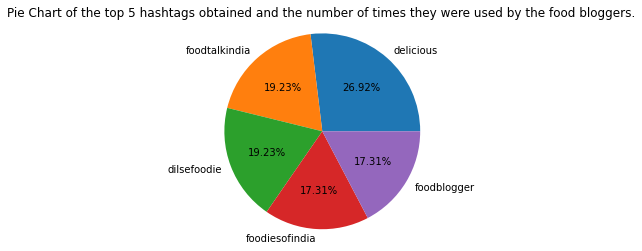

In [51]:
import matplotlib.pyplot as plt
size = hfrequency[0:5]
labels = hword[0:5]
plt.pie(size, labels = labels, autopct = "%.2f%%")
plt.title("Pie Chart of the top 5 hashtags obtained and the number of times they were used by the food bloggers.")
plt.axis("equal")
plt.show()

## Question: 3

>You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

    1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    2.Calculate the average likes for a handle.
    3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
    4.Create a bar graph to depict the above obtained information.


In [107]:
topfive = {'foodnetwork': 12760921, 'foodie_incarnate': 1465130, 'dilsefoodie': 1066035, 'foodtalkindia': 309353, 'foodfoodtv': 272284}

In [108]:
def search_open(driver, query):
    try :
        search_box = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "_aauy")))
        search_box.clear()
        search_box.send_keys(query)

        #waiting for the first element to load
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_abm4'))).click()

    
    except TimeoutException:
        print("can't search!")

In [115]:
import numpy as np
likes_to_followers = {}
likes_top_10 = {}
avg = {}
for i in topfive:
    
    search_open(driver,i)
    time.sleep(2)
    
    #clicking on the first post
    element = driver.find_element(By.XPATH,'//div[starts-with(@class,"_aabd ")]')
    time.sleep(1)
    driver.execute_script("arguments[0].scrollIntoView(true);", element)
    time.sleep(1)
    element.click()


    counts = []
    count = 1
    while count < 11:
        try:
            likes = wait.until(EC.presence_of_element_located((By.XPATH, "//section[contains(@class, '_ae5m')]/div/div/div/a/div/span"))).text
            likes_count = int(likes.replace(",",""))
            counts.append(likes_count)
            likes_top_10[i] = counts
        except TimeoutException:
            views = wait.until(EC.element_to_be_clickable((By.XPATH, "//section[contains(@class, '_ae5m')]/div/span")))
            views.click()
            likes = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class = '_aauu']/span"))).text
            likes_count = int(likes.replace(",",""))
            likes_top_10[i] = counts
      
        next_post = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(@class,'_aaqg')]/button")))
        driver.execute_script("arguments[0].click();", next_post)

        count += 1
        
    counts = np.array(counts)
    avg[i] = counts.mean()
    likes_to_followers[i] = counts.mean()/topfive[i]
    driver.back()
    time.sleep(2)
    driver.back()
    time.sleep(2)
        


print("Likes count of top 10 posts : ", likes_top_10)
print("Average likes : ", avg)
print("likes to followers ratio : ", likes_to_followers)
        

Likes count of top 10 posts :  {'foodnetwork': [2191, 1218, 1097, 3176, 1604, 6227, 5557, 1115, 1625], 'foodie_incarnate': [2439, 17378, 43591, 28994, 5419, 10081, 15031, 16480, 57408, 33258], 'dilsefoodie': [6146, 13122, 9706, 13902, 13481, 175413, 15616, 12468, 21395, 19975], 'foodtalkindia': [153, 532, 434, 383, 514, 238, 329, 390, 674, 792], 'foodfoodtv': [235, 110, 96, 116, 218, 292, 181, 360, 504, 155]}
Average likes :  {'foodnetwork': 2645.5555555555557, 'foodie_incarnate': 23007.9, 'dilsefoodie': 30122.4, 'foodtalkindia': 443.9, 'foodfoodtv': 226.7}
likes to followers ratio :  {'foodnetwork': 0.00020731697622417344, 'foodie_incarnate': 0.01570365769590412, 'dilsefoodie': 0.028256483136107166, 'foodtalkindia': 0.0014349303223178697, 'foodfoodtv': 0.0008325865640287347}


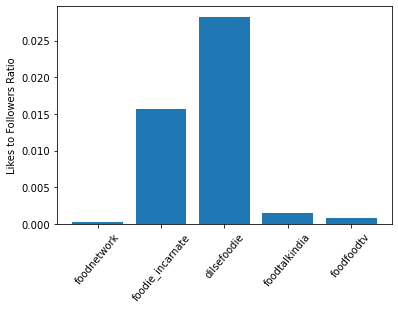

In [116]:
import matplotlib.pyplot as plt
dic = {'foodnetwork': 0.00020731697622417344, 'foodie_incarnate': 0.01570365769590412, 'dilsefoodie': 0.028256483136107166, 'foodtalkindia': 0.0014349303223178697, 'foodfoodtv': 0.0008325865640287347}
x = list(dic.keys())
y = list(dic.values())
plt.bar(x,y,align = 'center')
plt.ylabel("Likes to Followers Ratio")
plt.xticks(x,rotation = 50)
plt.show()